In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Disease_train.csv')

Mounted at /content/drive


In [ ]:
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,patient_id,diagnosis
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,1,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,2,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,3,0
3,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,7,0
4,0.772245,0.198716,0.005522,0.815461,0.706857,0.729007,0.771270,0.074045,0.358466,0.115869,8,0


In [ ]:
df.shape

(4000, 12)

In [ ]:
df.isnull().sum()


feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
patient_id    0
diagnosis     0
dtype: int64

In [ ]:
df2=df.drop_duplicates()
df2.shape

(4000, 12)

Text(0.5, 0, 'feature_1')

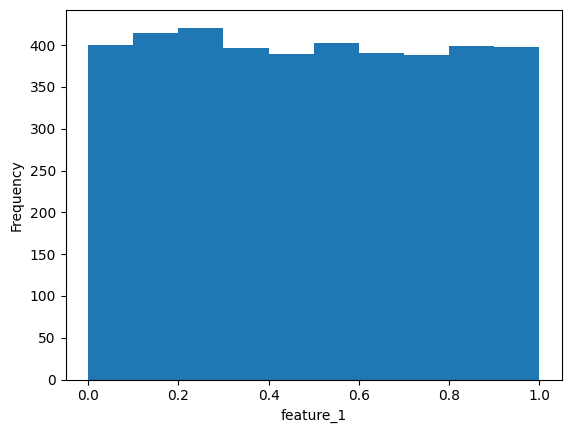

In [ ]:
df['feature_1'].plot.hist()
plt.xlabel("feature_1")

Text(0.5, 0, 'feature_2')

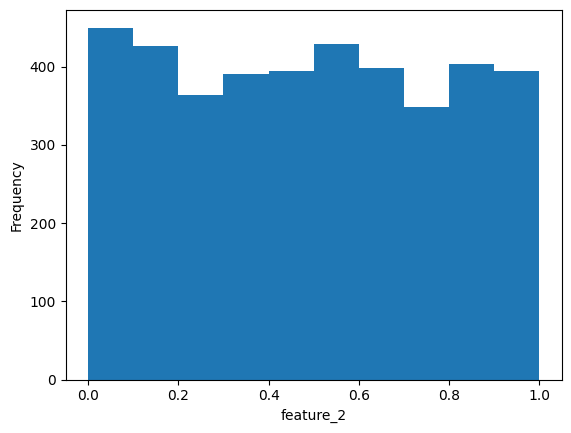

In [ ]:
df['feature_2'].plot.hist()
plt.xlabel("feature_2")

Text(0.5, 0, 'feature_4')

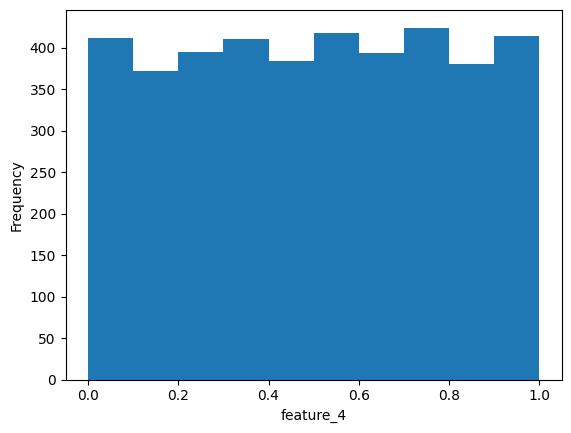

In [ ]:
df['feature_4'].plot.hist()
plt.xlabel("feature_4")

Text(0.5, 0, 'feature_5')

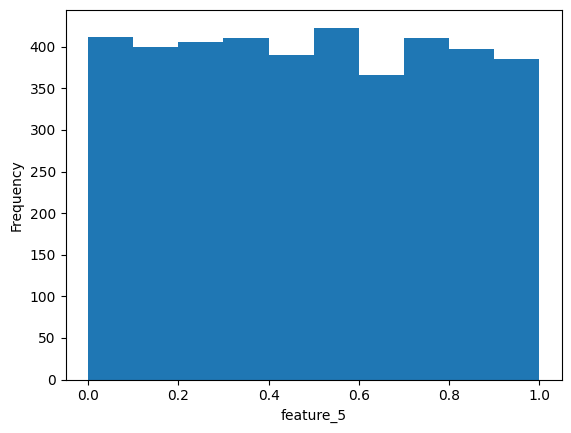

In [ ]:
df['feature_5'].plot.hist()
plt.xlabel("feature_5")

Text(0.5, 0, 'feature_6')

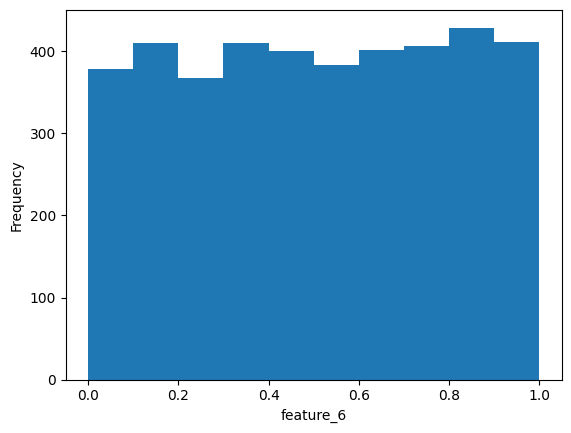

In [ ]:
df['feature_6'].plot.hist()
plt.xlabel("feature_6")

Text(0.5, 0, 'feature_7')

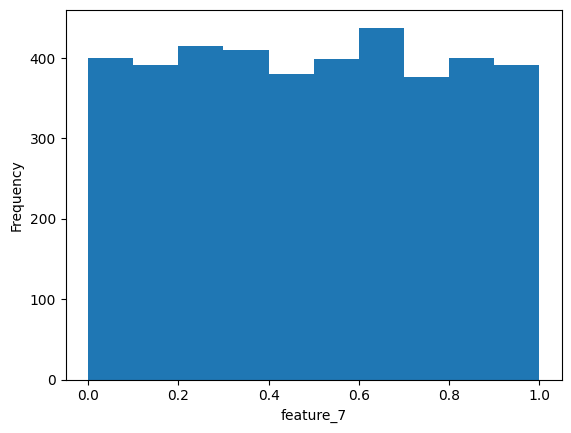

In [ ]:
df['feature_7'].plot.hist()
plt.xlabel("feature_7")

Text(0.5, 0, 'feature_8')

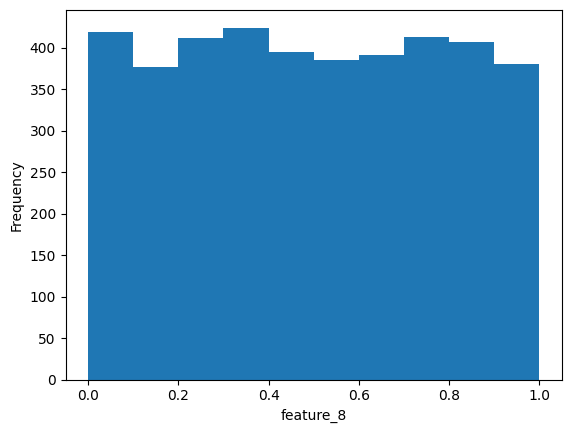

In [ ]:
df['feature_8'].plot.hist()
plt.xlabel("feature_8")

Text(0.5, 0, 'feature_9')

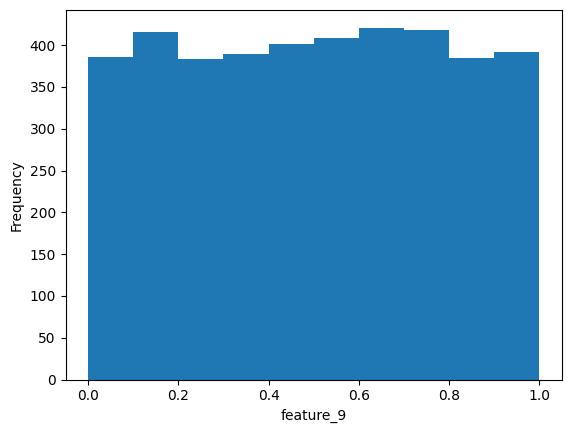

In [ ]:
df['feature_9'].plot.hist()
plt.xlabel("feature_9")

Text(0.5, 0, 'feature_10')

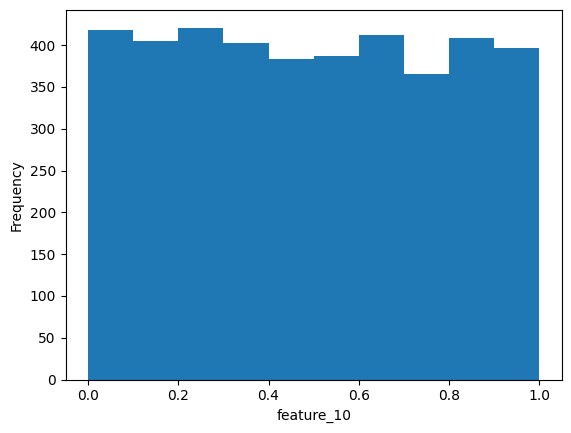

In [ ]:
df['feature_10'].plot.hist()
plt.xlabel("feature_10")

<Axes: >

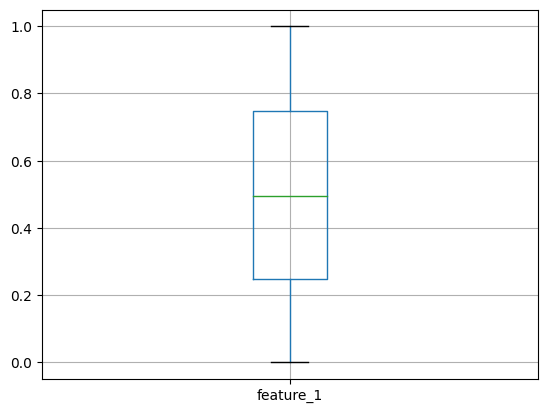

In [ ]:
df.boxplot(column=['feature_1'])

<Axes: >

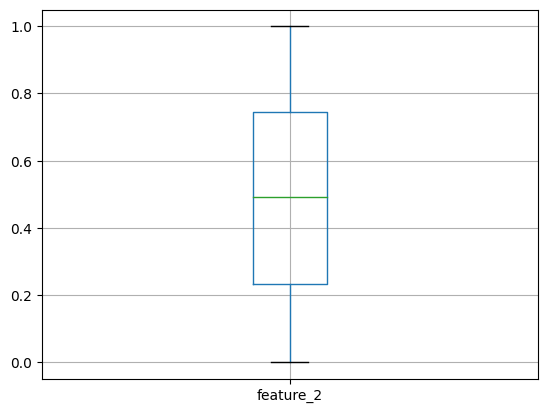

In [ ]:
df.boxplot(column=['feature_2'])

<Axes: >

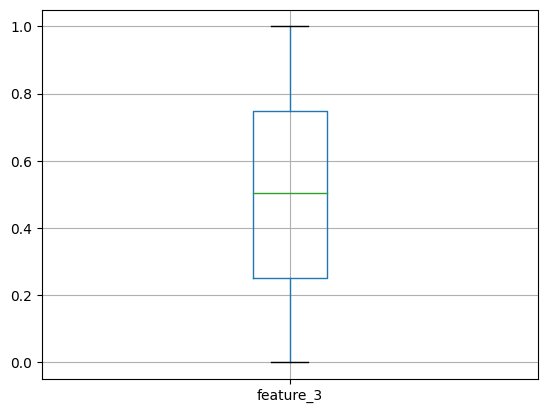

In [ ]:
df.boxplot(column=['feature_3'])

<Axes: >

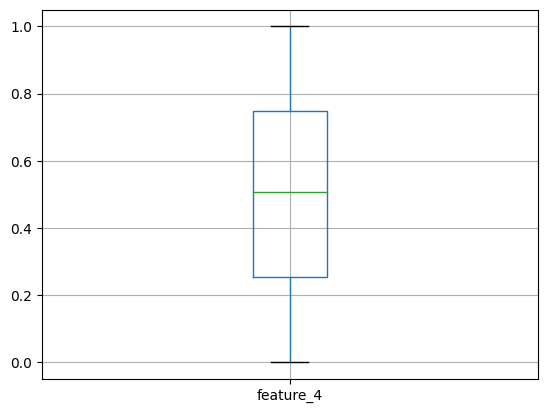

In [ ]:
df.boxplot(column=['feature_4'])

<Axes: >

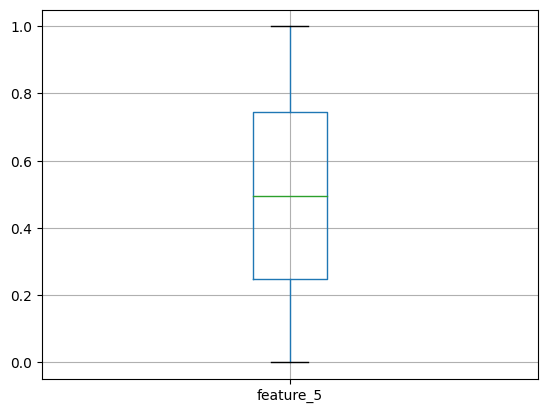

In [ ]:
df.boxplot(column=['feature_5'])

<Axes: >

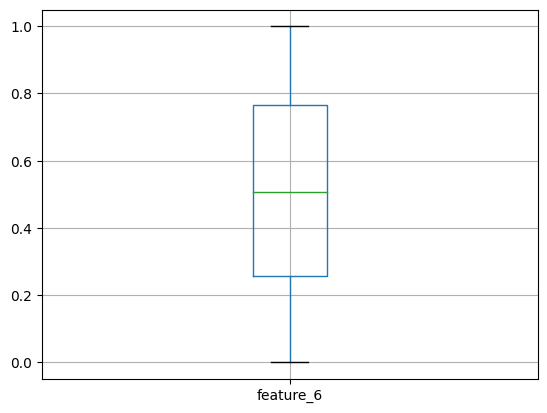

In [ ]:
df.boxplot(column=['feature_6'])

<Axes: >

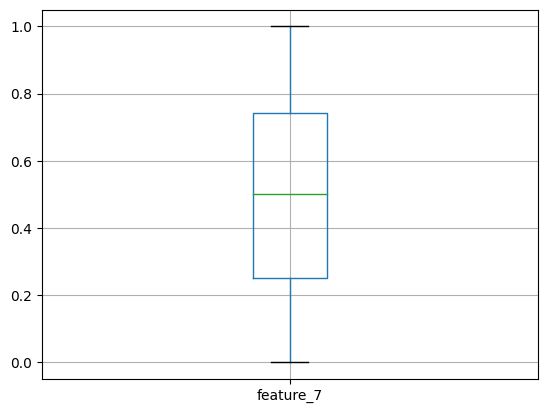

In [ ]:
df.boxplot(column=['feature_7'])

<Axes: >

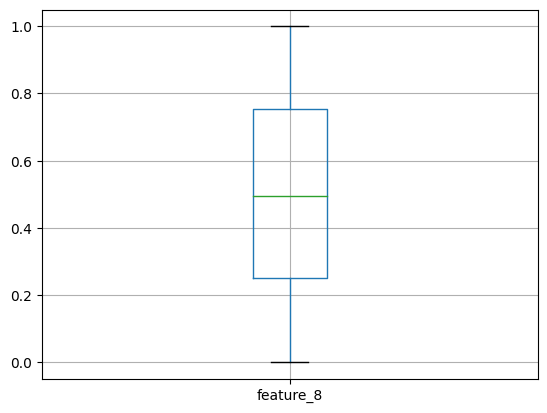

In [ ]:
df.boxplot(column=['feature_8'])

<Axes: >

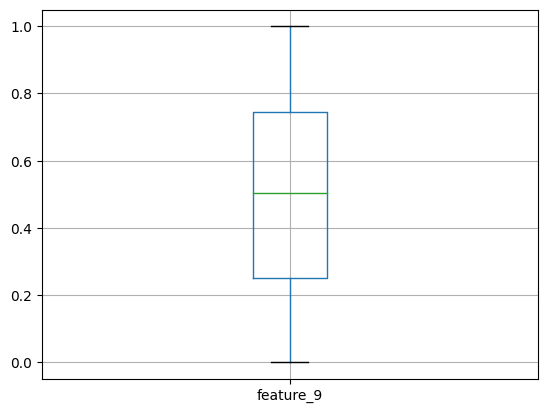

In [ ]:
df.boxplot(column=['feature_9'])

<Axes: >

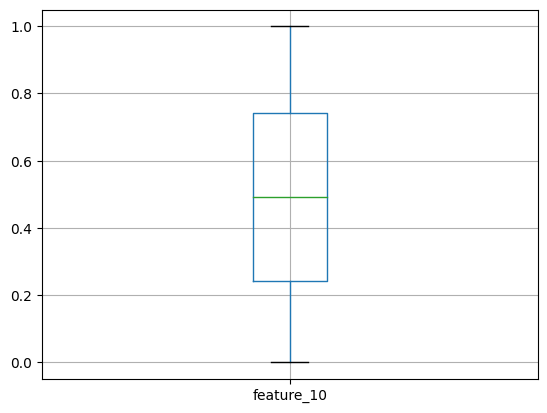

In [ ]:
df.boxplot(column=['feature_10'])

In [ ]:
df['feature_1'].skew()

0.02608103782967582

In [ ]:
df['feature_1'].kurtosis()

-1.2105918137570502

In [ ]:
df['diagnosis'].value_counts()

diagnosis
0    3804
1     196
Name: count, dtype: int64

In [ ]:



df = df.drop('patient_id', axis=1)





X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)





scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)





In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

gb_optimized = GradientBoostingClassifier(**best_params, random_state=42)
gb_optimized.fit(X_train_scaled, y_train)

y_val_pred = gb_optimized.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_val_proba = gb_optimized.predict_proba(X_val_scaled)[:, 1]

print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = gb_optimized.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_proba = gb_optimized.predict_proba(X_test_scaled)[:, 1]

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

val_roc_auc = roc_auc_score(y_val, y_val_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Validation ROC-AUC Score:", val_roc_auc)
print("Test ROC-AUC Score:", test_roc_auc)

test_df = pd.read_csv('/content/drive/MyDrive/Disease_test.csv')

patient_id = test_df['patient_id']

test_df = test_df.drop('patient_id', axis=1)

X_external_test = scaler.transform(test_df)

external_test_pred = gb_optimized.predict(X_external_test)

predictions_df = pd.DataFrame({'patient_id': patient_id, 'prediction': external_test_pred})

print(predictions_df['prediction'].value_counts())

predictions_df.to_csv('/content/drive/MyDrive/SE22UCSE225_predictions.csv', index=False)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found by GridSearchCV: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Validation Accuracy: 0.9513797634691196
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       765
           1       0.93      0.97      0.95       757

    accuracy                           0.95      1522
   macro avg       0.95      0.95      0.95      1522
weighted avg       0.95      0.95      0.95      1522

Test Accuracy: 0.938239159001314
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       766
           1       0.91      0.98      0.94       756

    accuracy                           0.94      1522
   macro avg       0.94      0.94      0.94      1522
weighted avg       0.94      0.94      0.94      1522

Validation ROC-AUC Score: 0.98

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install scikit-optimize

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.combine import SMOTEENN
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Disease_train.csv')

# Initial data inspection
print(df.head())
print(df.shape)
print(df.isnull().sum())

# Drop duplicates
df2 = df.drop_duplicates()
print(df2.shape)

# Distribution of the target variable
print(df['diagnosis'].value_counts())
# Drop patient_id column
df = df.drop('patient_id', axis=1)
# Separate features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Standardize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter space for Bayesian optimization
param_space = {
    'n_estimators': Integer(50, 300),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.8, 1.0, 'uniform')
}

# Perform Bayesian optimization
bayes_search = BayesSearchCV(estimator=gb_model, search_spaces=param_space, cv=5, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train_scaled, y_train)

# Best parameters found by Bayesian optimization
best_params = bayes_search.best_params_
print("Best parameters found by Bayesian optimization:", best_params)

# Train the Gradient Boosting model with the best parameters
gb_optimized = GradientBoostingClassifier(**best_params, random_state=42)
gb_optimized.fit(X_train_scaled, y_train)

# Validate the model
y_val_pred = gb_optimized.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_val_proba = gb_optimized.predict_proba(X_val_scaled)[:, 1]

print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = gb_optimized.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_proba = gb_optimized.predict_proba(X_test_scaled)[:, 1]

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute ROC-AUC scores
val_roc_auc = roc_auc_score(y_val, y_val_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print ROC-AUC scores
print("Validation ROC-AUC Score:", val_roc_auc)
print("Test ROC-AUC Score:", test_roc_auc)

# Load and preprocess the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/Disease_test.csv')

patient_id = test_df['patient_id']

test_df = test_df.drop('patient_id', axis=1)

# Transform the test dataset
X_external_test = scaler.transform(test_df)

# Predict on the new test dataset
external_test_pred = gb_optimized.predict(X_external_test)

# Print predictions along with patient IDs and diagnosis
predictions_df = pd.DataFrame({'patient_id': patient_id, 'diagnosis': external_test_pred})
print(predictions_df)

# Save predictions to CSV
predictions_df.to_csv('/content/drive/MyDrive/Disease_predictions.csv', index=False)

# Print the number of 0's and 1's in the test data predictions
print(predictions_df['diagnosis'].value_counts())

# Print the number of 0's and 1's in the original train data diagnosis column
print(df['diagnosis'].value_counts())
